<a href="https://colab.research.google.com/github/marcelob2007/CienciaDeDados/blob/main/Execicio_4_Marcelo_Soares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import ResidualsPlot

from google.colab import files 

import io 

In [3]:
uploaded = files.upload()

Saving Summary of Weather.csv to Summary of Weather.csv


In [4]:
df = pd.read_csv(io.BytesIO(uploaded['Summary of Weather.csv'])) 
print(df)

          STA        Date Precip  WindGustSpd    MaxTemp    MinTemp  \
0       10001    1942-7-1  1.016          NaN  25.555556  22.222222   
1       10001    1942-7-2      0          NaN  28.888889  21.666667   
2       10001    1942-7-3   2.54          NaN  26.111111  22.222222   
3       10001    1942-7-4   2.54          NaN  26.666667  22.222222   
4       10001    1942-7-5      0          NaN  26.666667  21.666667   
...       ...         ...    ...          ...        ...        ...   
119035  82506  1945-12-27      0          NaN  28.333333  18.333333   
119036  82506  1945-12-28  9.906          NaN  29.444444  18.333333   
119037  82506  1945-12-29      0          NaN  28.333333  18.333333   
119038  82506  1945-12-30      0          NaN  28.333333  18.333333   
119039  82506  1945-12-31      0          NaN  29.444444  17.222222   

         MeanTemp Snowfall PoorWeather  YR  ...  FB  FTI ITH  PGT  TSHDSBRSGF  \
0       23.888889      0.0         NaN  42  ... NaN  NaN NaN  NaN 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df.corr()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
STA,1.000000,-0.549603,0.092371,0.059319,0.078112,0.121408,-0.008592,0.000903,-0.832958,-0.549603,...,NaN,NaN,NaN,NaN,-0.139697,NaN,NaN,NaN,NaN,NaN
WindGustSpd,-0.549603,1.000000,-0.124238,0.311690,0.197264,NaN,0.149525,0.002081,0.351027,1.000000,...,NaN,NaN,NaN,NaN,0.063630,NaN,NaN,NaN,NaN,NaN
MaxTemp,0.092371,-0.124238,1.000000,0.878384,0.969048,0.039585,0.031346,-0.005130,0.011875,-0.124238,...,NaN,NaN,NaN,NaN,-0.077015,NaN,NaN,NaN,NaN,NaN
MinTemp,0.059319,0.311690,0.878384,1.000000,0.965425,-0.020733,0.069078,-0.002576,0.525019,0.311690,...,NaN,NaN,NaN,NaN,0.007828,NaN,NaN,NaN,NaN,NaN
MeanTemp,0.078112,0.197264,0.969048,0.965425,1.000000,0.010681,0.050769,-0.004153,0.407395,0.197264,...,NaN,NaN,NaN,NaN,-0.022448,NaN,NaN,NaN,NaN,NaN
YR,0.121408,NaN,0.039585,-0.020733,0.010681,1.000000,-0.144360,-0.011196,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MO,-0.008592,0.149525,0.031346,0.069078,0.050769,-0.144360,1.000000,0.006563,0.655035,0.149525,...,NaN,NaN,NaN,NaN,0.106800,NaN,NaN,NaN,NaN,NaN
DA,0.000903,0.002081,-0.005130,-0.002576,-0.004153,-0.011196,0.006563,1.000000,0.012000,0.002081,...,NaN,NaN,NaN,NaN,0.001121,NaN,NaN,NaN,NaN,NaN
DR,-0.832958,0.351027,0.011875,0.525019,0.407395,NaN,0.655035,0.012000,1.000000,0.351027,...,NaN,NaN,NaN,NaN,0.099215,NaN,NaN,NaN,NaN,NaN
SPD,-0.549603,1.000000,-0.124238,0.311690,0.197264,NaN,0.149525,0.002081,0.351027,1.000000,...,NaN,NaN,NaN,NaN,0.063630,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')

In [7]:
metricas = ["MO"]
x = df[metricas]
x.head()

,MO
0,7
1,7
2,7
3,7
4,7


In [8]:
saida = ["DA"]
y = df[saida]
y.head()

,DA
0,1
1,2
2,3
3,4
4,5


In [9]:
df.isnull().sum()


STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

In [10]:
df.isnull()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,False,False,False,True,False,False,False,False,True,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,True,False,False,False,False,True,False,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,True,False,False,False,False,True,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,True,False,False,False,False,True,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,True,False,False,False,False,True,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,False,False,False,True,False,False,False,False,True,False,...,True,True,True,True,True,True,True,True,True,True
119036,False,False,False,True,False,False,False,False,False,False,...,True,True,True,True,False,True,True,True,True,True
119037,False,False,False,True,False,False,False,False,False,False,...,True,True,True,True,False,True,True,True,True,True
119038,False,False,False,True,False,False,False,False,True,False,...,True,True,True,True,True,True,True,True,True,True


In [11]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size =0.9)
print(treino_x.shape)
print(teste_x.shape)

(11904, 1)
(107136, 1)


In [12]:
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

Treinaremos com 11904 elementos e testaremos com 107136 elementos


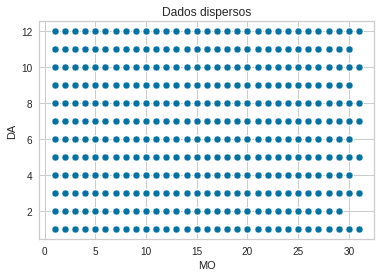

In [13]:
ax = sns.scatterplot(x=treino_y['DA'], y=treino_x['MO'])

ax.set_title('Dados dispersos')
ax.set_xlabel('MO')
ax.set_ylabel('DA')
plt.show()

In [14]:
WindGustSpd = np.log(treino_y['DA'])
MaxTemp = np.log(treino_x['MO'])

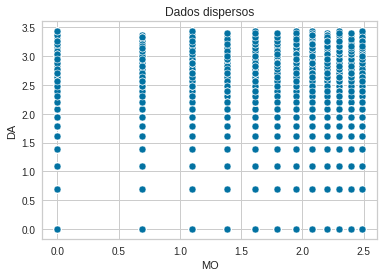

In [15]:
ax = sns.scatterplot(x=MaxTemp, y=WindGustSpd)

ax.set_title('Dados dispersos')
ax.set_xlabel('MO')
ax.set_ylabel('DA')
plt.show()

ax.set_title('Dados dispersos')
ax.set_xlabel('MO')
ax.set_ylabel('DA')
plt.show()

In [16]:
lr = LinearRegression()

In [17]:
lr.fit(treino_x,treino_y)

LinearRegression()

In [18]:
print(lr.intercept_)

print(lr.coef_)

[15.91909274]
[[0.00106966]]


In [19]:
test_pred = lr.predict(teste_x)
test_pred

array([[15.93085894],
       [15.92658032],
       [15.92978929],
       ...,
       [15.92978929],
       [15.9223017 ],
       [15.92337136]])

In [20]:
MesConhecido = np.log(100)
DiaDesconhecido = lr.predict([[MesConhecido]])
np.exp(DiaDesconhecido)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[8235945.08574971]])

In [21]:
r2_score(teste_y, test_pred)

-0.00025908601091084726

In [22]:
rmse = sqrt(mean_squared_error(teste_y, test_pred))
print(rmse)

mae = mean_absolute_error(teste_y, test_pred)
print(mae)

8.790435341564194
7.60156957920275


-0.0021387173027944684

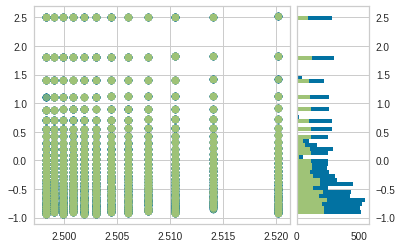

In [26]:
x1 = np.log(treino_x)
y1 = np.log(treino_y)

X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=42)

model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(np.array(X_train), np.array(y_train))  
visualizer.score(np.array(X_test), np.array(y_test))

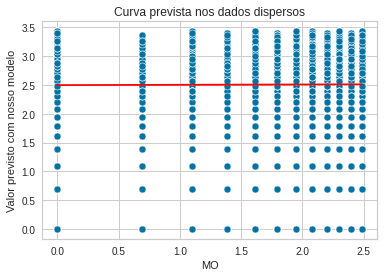

In [27]:
DA_ = np.array(np.log(teste_y['DA']))
MO_ = np.array(np.log(teste_x['MO']))

ax = sns.scatterplot(x=MO_, y=DA_)

model = LinearRegression()
model.fit(np.array(MO_).reshape(len(MO_),1), DA_)

y_p = model.predict(np.array(MO_).reshape(len(MO_),1))

ax = sns.lineplot(x=MO_,y = y_p, color = 'red')

ax.set_title('Curva prevista nos dados dispersos')
ax.set_xlabel('MO')
ax.set_ylabel('Valor previsto com nosso modelo')
plt.show()